In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('census.income_csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns in dataset

In [5]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

There is class imbalance but its not much severe

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In Dataset there is integer and object dtypes

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

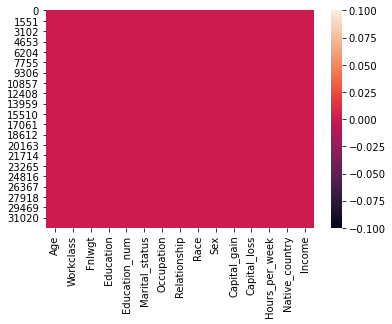

In [8]:
sns.heatmap(df.isnull())

There are no null values in dataset

Droping some useless column which are not helping in to find income

In [9]:
df.drop('Relationship',inplace=True,axis=1)

In [10]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K


As we can see we have 32560 rows and 14 columns

<AxesSubplot:xlabel='count', ylabel='Workclass'>

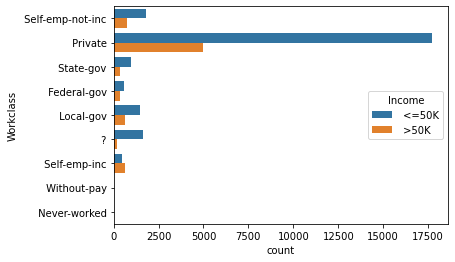

In [11]:
sns.countplot(y='Workclass',hue='Income',data=df)

<AxesSubplot:xlabel='count', ylabel='Occupation'>

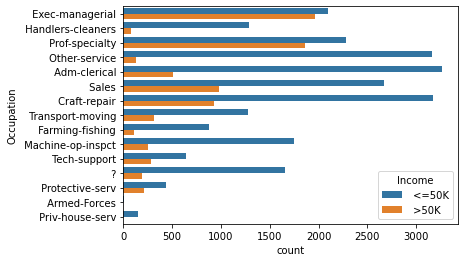

In [12]:
sns.countplot(y='Occupation',hue='Income',data=df)

<AxesSubplot:xlabel='count', ylabel='Education'>

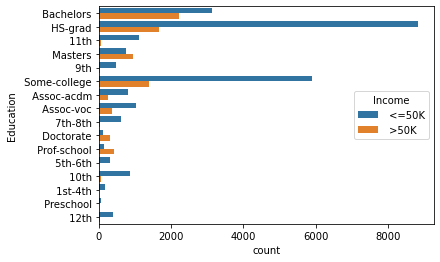

In [13]:
sns.countplot(y='Education',hue='Income',data=df)

As we already know that the more you are educated the more you earn as shown in the above figure

Lets convert the categorical data into numerical which will help us to find outliers and for model building

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
ode=OrdinalEncoder()

In [16]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=ode.fit_transform(df[i].values.reshape(-1,1))

In [17]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,4.0,1.0,0,0,20,39.0,0.0


We have convert our categorical data in numerical we use ordinal encode to make float dtype which helps us to 
visualize data easily

In [18]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


As we can see in some column mean are high than median and there are huge diferrence in 75% and max means there is outliers in the dataset which we will treat that in further step

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df['Income']=le.fit_transform(df['Income'])

In [21]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,4.0,1.0,0,0,20,39.0,0


Here we have use label encode because target column should not be in float type as it is recommended

In [22]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

As we can see there is high skewness in capital_gain and capital_loss

Age                   AxesSubplot(0.125,0.71587;0.133621x0.16413)
Workclass          AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Fnlwgt              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Education          AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Education_num      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Marital_status       AxesSubplot(0.125,0.518913;0.133621x0.16413)
Occupation        AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Race               AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Sex               AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Capital_gain      AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Capital_loss         AxesSubplot(0.125,0.321957;0.133621x0.16413)
Hours_per_week    AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Native_country     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Income            AxesSubplot(0.606034,0.321957;0.133621x0.16413)
dtype: object

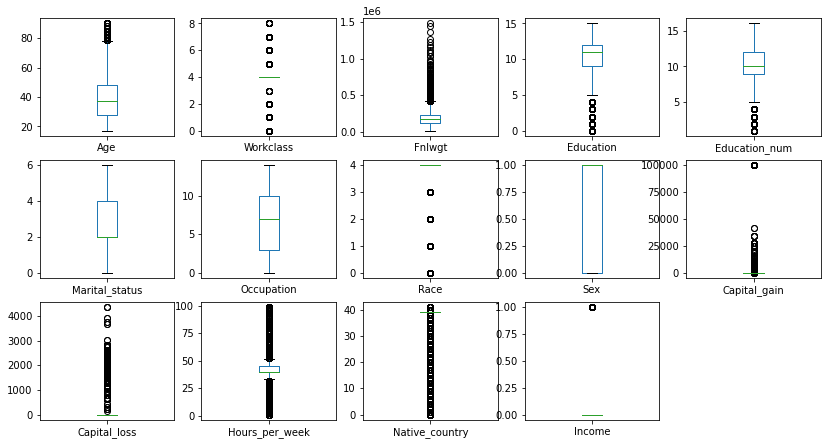

In [23]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(14,10))

From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, 

Lets remove outlier using percentile method 

In [24]:
min_threshold,max_threshold=df.Fnlwgt.quantile([0.001,0.999])
min_threshold,max_threshold

(20316.385000000002, 766683.0080000032)

In [25]:
min_threshold,max_threshold=df.Hours_per_week.quantile([0.001,0.999])
min_threshold,max_threshold

(2.0, 99.0)

In [26]:
df2=df[(df.Hours_per_week<max_threshold) & (df.Hours_per_week>min_threshold)]

In [27]:
df2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,4.0,1.0,0,0,20,39.0,0


In [28]:
df3=df2[(df.Native_country<max_threshold) & (df.Native_country>min_threshold)]

In [29]:
df3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,4.0,1.0,0,0,20,39.0,0


In [30]:
df3.shape

(31704, 14)

In [31]:
df.shape

(32560, 14)

After removing outlier we have 31704 row and 14 columns 

As we have use percentile method to remove outliers becasue in zscore there was huge loss of data 

# Model Building

Now we will seperate our feature and target column for model building

In [32]:
x=df3.drop('Income',axis=1)
y=df3['Income']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))      

0.8547547705409242
[[4483  315]
 [ 606  937]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4798
           1       0.75      0.61      0.67      1543

    accuracy                           0.85      6341
   macro avg       0.81      0.77      0.79      6341
weighted avg       0.85      0.85      0.85      6341



In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8091783630342217
[[4169  629]
 [ 581  962]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4798
           1       0.60      0.62      0.61      1543

    accuracy                           0.81      6341
   macro avg       0.74      0.75      0.74      6341
weighted avg       0.81      0.81      0.81      6341



In [39]:
from sklearn.svm import SVC

In [40]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7899384955054408
[[4792    6]
 [1326  217]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4798
           1       0.97      0.14      0.25      1543

    accuracy                           0.79      6341
   macro avg       0.88      0.57      0.56      6341
weighted avg       0.83      0.79      0.72      6341



In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8569582960424299


In [43]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.7952308818927644


In [44]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.811853293647023


After Cross validation Random forest is our best model

# Hyper parameter Tuning 

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [47]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x_train,y_train)
GCV_RF.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [55]:
RF_mod=RandomForestClassifier(criterion='entropy',max_features='auto',max_depth=8,n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
(accuracy_score(y_test,pred))

0.8523892130578773

# AUC ROC CURVE

In [49]:
from sklearn.metrics import plot_roc_curve

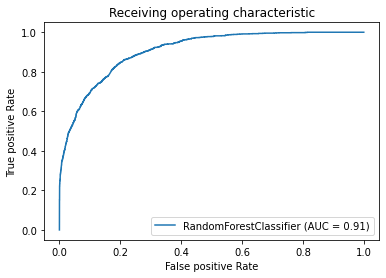

In [50]:
plot_roc_curve(RF_mod,x_test,y_test)
plt.title('Receiving operating characteristic')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()

In [51]:
import pickle

In [52]:
filename='census.income-csv.pkl'
pickle.dump(RF_mod,open(filename,'wb'))

In [53]:
import joblib

In [54]:
joblib.dump(RF_mod,'census.income_csv2.pkl')

['census.income_csv2.pkl']

# Observation

* There were no null value in datset

* Use Ordinal Encoder and Label Encoder to convert categorical column into numerical

* Dropping one column which were useless to find income in the dataset

* As we can see in some column mean are high than median and there are huge diferrence in 75% and max in some column

* Use percentile method to remove outlier as in zscore there were huge loss of data and in IQR method 25 percentile and
75 are mostly zero so it was difficult to remove outlier

* Exc-managerial and Prof specialiast are the front runner who are earning more than 50k followed by Sales and Craft Repair

* As we can see the more higher degree you have the more you earn as shown in the above diagram

* Private Employees earn more than goverment employees

* Use hyper parameter tuning of Random forest classifier

* Use SVC model from verification as we can see F1 score in SVC is very low it shows how decision tree and random forest 
good for all round performance